# Importing libraries and dataset
## Libraries

In [1]:
import pandas as pd 
import numpy as np
import keras
import matplotlib.pyplot as plt
# %matplotlib notebook
import cv2
import tensorflow_addons as tfa

## Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df  = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv" )

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
t = train_df.iloc[:,0].values
y_train = np.where(t > 8 , t-1, t)
X_train = train_df.iloc[:,1:].values.reshape(-1,28,28,1).astype('uint8')

t = test_df.iloc[:,0].values
y_test  = np.where(t > 8 , t-1, t)
X_test  = test_df.iloc[:,1 :].values.reshape(-1,28,28,1).astype('uint8')

print(f'X: {X_train.shape}\t{X_train.min(),X_train.max()}\ny:{y_train.shape}\t\t{y_train.min(),y_train.max()}')
print(f'X: {X_test.shape}\t{X_test.min(),X_test.max()}\ny:{y_test.shape}\t\t{y_test.min(),y_test.max()}')

X: (27455, 28, 28, 1)	(0, 255)
y:(27455,)		(0, 23)
X: (7172, 28, 28, 1)	(0, 255)
y:(7172,)		(0, 23)


# Visualization

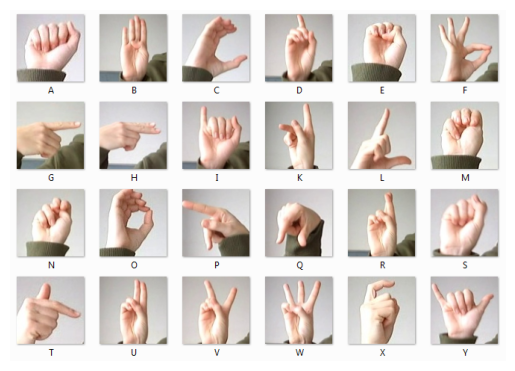

In [6]:
plt.imshow(cv2.imread("/kaggle/input/sign-language-mnist/amer_sign2.png",cv2.IMREAD_COLOR)[...,::-1])
plt.axis('off')
plt.show()

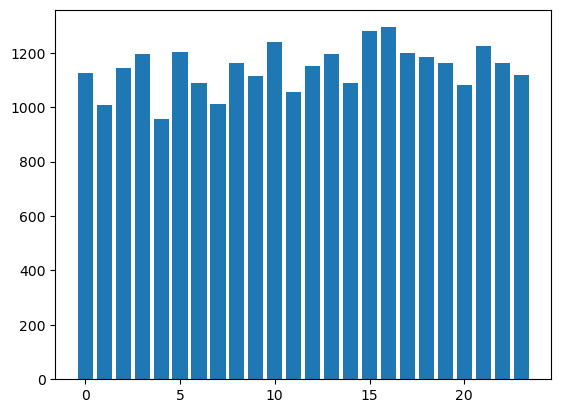

In [7]:
char_to_label_mapping_dict = {
    'A': 0 ,'B': 1 ,'C': 2 ,'D': 3 ,'E': 4 ,'F': 5 ,
    'G': 6 ,'H': 7 ,'I': 8 ,'K': 9 ,'L': 10,'M': 11,
    'N': 12,'O': 13,'P': 14,'Q': 15,'R': 16,'S': 17,
    'T': 18,'U': 19,'V': 20,'W': 21,'X': 22,'Y': 23,
}

label_to_char_mapping_dict = {
    v : k for k,v in char_to_label_mapping_dict.items()
}
plt.hist(y_train, bins = range(0,25), rwidth = .8, align = 'left',label = list(char_to_label_mapping_dict.keys()))
plt.show()

In [8]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

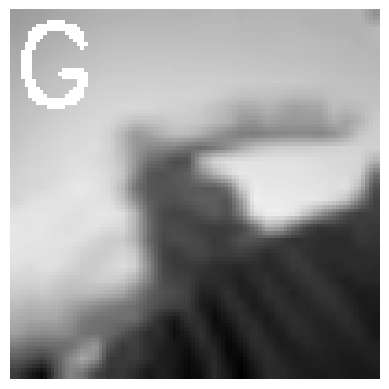

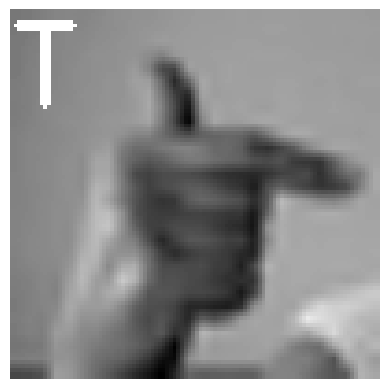

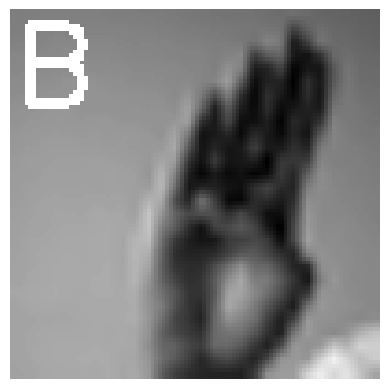

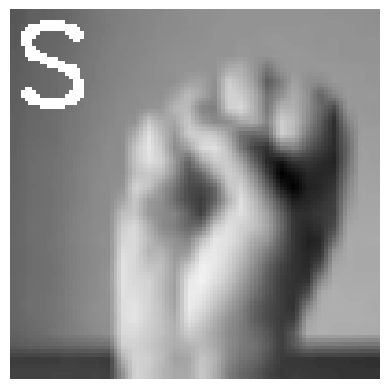

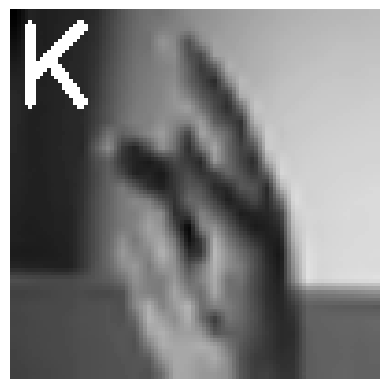

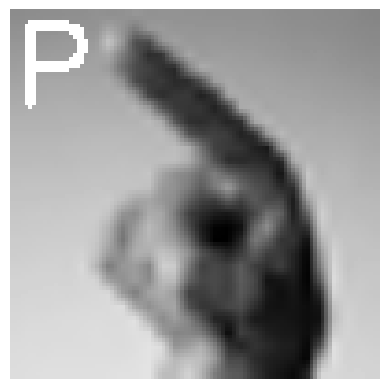

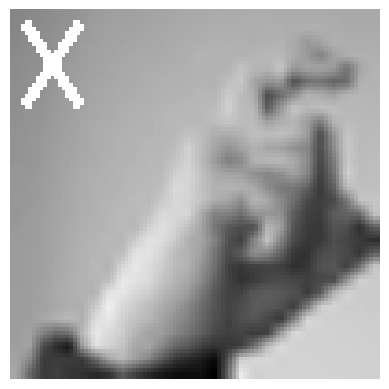

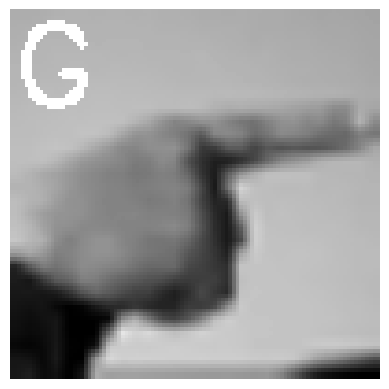

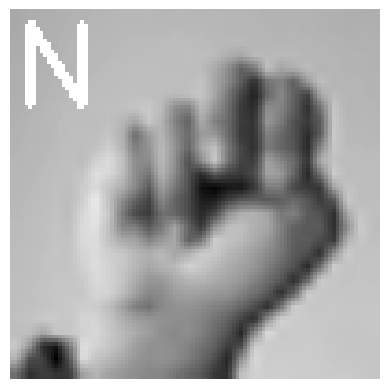

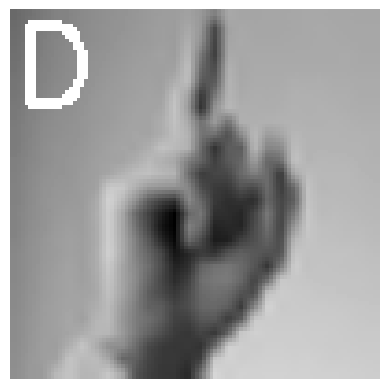

In [9]:
for i in np.random.choice(range(X_train.shape[0]),10):
#     cv2.putText(
#             img = cv2.imread("C:Users/ENG-13.NCPC/Desktop/Datasets/cat_vs_dog/train/cat/cat.0.jpg").shape,
#             text = label_to_char_mapping_dict[y_train[i]],
#             color = (0),
#             bottomLeftOrigin = True,
#             org = (0,0),
#             fontFace = cv2.FONT_HERSHEY_COMPLEX,
#             fontScale = 5
#         )
    plt.imshow(
        cv2.putText(
            thickness = 2,
            img = cv2.resize(X_train[i],(100,100)),
            text = label_to_char_mapping_dict[y_train[i]],
            color = 255,
#             bottomLeftOrigin = True,
            org = (1,25),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 1
        ),
        'gray'
    )

#     plt.figure(figsize=(100,100))
    plt.axis('off')
    plt.show()

# Preprocessing

In [10]:
y_train, X_train = keras.utils.to_categorical(y_train), X_train /255
y_test , X_test  = keras.utils.to_categorical(y_test) , X_test  /255
print(f'X: {X_train.shape}\t{X_train.min(),X_train.max()}\ny: {y_train.shape}\t\t{y_train.min(),y_train.max()}')
print(f'X: {X_test.shape} \t{X_test.min(),X_test.max()}  \ny: {y_test.shape} \t\t{y_test.min() ,y_test.max()} ')

X: (27455, 28, 28, 1)	(0.0, 1.0)
y: (27455, 24)		(0.0, 1.0)
X: (7172, 28, 28, 1) 	(0.0, 1.0)  
y: (7172, 24) 		(0.0, 1.0) 


# Model

## Structure

In [11]:
model = keras.Sequential(
[
    keras.layers.RandomRotation(factor = 0.03, input_shape=(28,28,1)),
    keras.layers.RandomZoom(0.05),
#     keras.layers.RandomTranslation(0.05,0.05),
    keras.layers.Conv2D(32 ,(3,3) ,activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3) , padding ='same', activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(256,(3,3), padding ='same', activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation =    'relu'),
    keras.layers.Dense(24 , activation = 'softmax')
]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Callbacks

In [13]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'sign_mnist_model_1.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)
lr_red = keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.8,
    verbose = 1,
    cooldown = 5

    
)

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_accuracy',
    
# )

## Training the model

In [14]:
history = model.fit(X_train,y_train,
          batch_size =16,
          epochs = 100,
          validation_data = (X_test, y_test),
          callbacks = [
              tfa.callbacks.TQDMProgressBar(),
              model_checkpoint,
#              lr_red
          ]
     )

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/1716           ETA: ?s - 

Epoch 1/100
1716/1716 [==============================] - ETA: 0s - loss: 2.7017 - accuracy: 0.1631
Epoch 1: val_accuracy improved from -inf to 0.59788, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 61s 33ms/step - loss: 2.7017 - accuracy: 0.1631 - val_loss: 1.2193 - val_accuracy: 0.5979
Epoch 2/100


0/1716           ETA: ?s - 

Epoch 2/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.8896 - accuracy: 0.6861
Epoch 2: val_accuracy improved from 0.59788 to 0.90658, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 59s 34ms/step - loss: 0.8895 - accuracy: 0.6862 - val_loss: 0.3330 - val_accuracy: 0.9066
Epoch 3/100


0/1716           ETA: ?s - 

Epoch 3/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.4930 - accuracy: 0.8290
Epoch 3: val_accuracy improved from 0.90658 to 0.94492, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 56s 33ms/step - loss: 0.4929 - accuracy: 0.8290 - val_loss: 0.2017 - val_accuracy: 0.9449
Epoch 4/100


0/1716           ETA: ?s - 

Epoch 4/100
1716/1716 [==============================] - ETA: 0s - loss: 0.3484 - accuracy: 0.8793
Epoch 4: val_accuracy improved from 0.94492 to 0.94702, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 56s 33ms/step - loss: 0.3484 - accuracy: 0.8793 - val_loss: 0.1707 - val_accuracy: 0.9470
Epoch 5/100


0/1716           ETA: ?s - 

Epoch 5/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.9022
Epoch 5: val_accuracy improved from 0.94702 to 0.95845, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 56s 33ms/step - loss: 0.2918 - accuracy: 0.9022 - val_loss: 0.1569 - val_accuracy: 0.9584
Epoch 6/100


0/1716           ETA: ?s - 

Epoch 6/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9172
Epoch 6: val_accuracy improved from 0.95845 to 0.97797, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 59s 34ms/step - loss: 0.2440 - accuracy: 0.9172 - val_loss: 0.0687 - val_accuracy: 0.9780
Epoch 7/100


0/1716           ETA: ?s - 

Epoch 7/100
1716/1716 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9288
Epoch 7: val_accuracy improved from 0.97797 to 0.97950, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 59s 34ms/step - loss: 0.2145 - accuracy: 0.9288 - val_loss: 0.1150 - val_accuracy: 0.9795
Epoch 8/100


0/1716           ETA: ?s - 

Epoch 8/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9346
Epoch 8: val_accuracy did not improve from 0.97950
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1945 - accuracy: 0.9346 - val_loss: 0.0888 - val_accuracy: 0.9757
Epoch 9/100


0/1716           ETA: ?s - 

Epoch 9/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1826 - accuracy: 0.9408
Epoch 9: val_accuracy did not improve from 0.97950
1716/1716 [==============================] - 58s 34ms/step - loss: 0.1825 - accuracy: 0.9408 - val_loss: 0.0887 - val_accuracy: 0.9789
Epoch 10/100


0/1716           ETA: ?s - 

Epoch 10/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.9443
Epoch 10: val_accuracy did not improve from 0.97950
1716/1716 [==============================] - 58s 34ms/step - loss: 0.1719 - accuracy: 0.9443 - val_loss: 0.0763 - val_accuracy: 0.9706
Epoch 11/100


0/1716           ETA: ?s - 

Epoch 11/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1577 - accuracy: 0.9492
Epoch 11: val_accuracy improved from 0.97950 to 0.99066, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1577 - accuracy: 0.9492 - val_loss: 0.0487 - val_accuracy: 0.9907
Epoch 12/100


0/1716           ETA: ?s - 

Epoch 12/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9505
Epoch 12: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 59s 34ms/step - loss: 0.1559 - accuracy: 0.9505 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 13/100


0/1716           ETA: ?s - 

Epoch 13/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9539
Epoch 13: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 56s 33ms/step - loss: 0.1429 - accuracy: 0.9539 - val_loss: 0.0643 - val_accuracy: 0.9826
Epoch 14/100


0/1716           ETA: ?s - 

Epoch 14/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9558
Epoch 14: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 56s 33ms/step - loss: 0.1366 - accuracy: 0.9558 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 15/100


0/1716           ETA: ?s - 

Epoch 15/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9571
Epoch 15: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1332 - accuracy: 0.9572 - val_loss: 0.0730 - val_accuracy: 0.9798
Epoch 16/100


0/1716           ETA: ?s - 

Epoch 16/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9608
Epoch 16: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1281 - accuracy: 0.9608 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 17/100


0/1716           ETA: ?s - 

Epoch 17/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9603
Epoch 17: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 59s 34ms/step - loss: 0.1207 - accuracy: 0.9603 - val_loss: 0.0727 - val_accuracy: 0.9838
Epoch 18/100


0/1716           ETA: ?s - 

Epoch 18/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9624
Epoch 18: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 59s 35ms/step - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.0707 - val_accuracy: 0.9870
Epoch 19/100


0/1716           ETA: ?s - 

Epoch 19/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9640
Epoch 19: val_accuracy did not improve from 0.99066
1716/1716 [==============================] - 58s 34ms/step - loss: 0.1174 - accuracy: 0.9640 - val_loss: 0.0672 - val_accuracy: 0.9900
Epoch 20/100


0/1716           ETA: ?s - 

Epoch 20/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9647
Epoch 20: val_accuracy improved from 0.99066 to 0.99122, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 60s 35ms/step - loss: 0.1137 - accuracy: 0.9647 - val_loss: 0.0433 - val_accuracy: 0.9912
Epoch 21/100


0/1716           ETA: ?s - 

Epoch 21/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1053 - accuracy: 0.9670
Epoch 21: val_accuracy did not improve from 0.99122
1716/1716 [==============================] - 59s 35ms/step - loss: 0.1053 - accuracy: 0.9670 - val_loss: 0.0539 - val_accuracy: 0.9872
Epoch 22/100


0/1716           ETA: ?s - 

Epoch 22/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9659
Epoch 22: val_accuracy did not improve from 0.99122
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1112 - accuracy: 0.9659 - val_loss: 0.0555 - val_accuracy: 0.9876
Epoch 23/100


0/1716           ETA: ?s - 

Epoch 23/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9663
Epoch 23: val_accuracy did not improve from 0.99122
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.0826 - val_accuracy: 0.9823
Epoch 24/100


0/1716           ETA: ?s - 

Epoch 24/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9691
Epoch 24: val_accuracy did not improve from 0.99122
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1030 - accuracy: 0.9691 - val_loss: 0.0733 - val_accuracy: 0.9845
Epoch 25/100


0/1716           ETA: ?s - 

Epoch 25/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.1017 - accuracy: 0.9698
Epoch 25: val_accuracy improved from 0.99122 to 0.99149, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 59s 35ms/step - loss: 0.1017 - accuracy: 0.9698 - val_loss: 0.0503 - val_accuracy: 0.9915
Epoch 26/100


0/1716           ETA: ?s - 

Epoch 26/100
1716/1716 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.9702
Epoch 26: val_accuracy improved from 0.99149 to 0.99233, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 57s 33ms/step - loss: 0.1010 - accuracy: 0.9702 - val_loss: 0.0269 - val_accuracy: 0.9923
Epoch 27/100


0/1716           ETA: ?s - 

Epoch 27/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9721
Epoch 27: val_accuracy did not improve from 0.99233
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0919 - accuracy: 0.9721 - val_loss: 0.0425 - val_accuracy: 0.9869
Epoch 28/100


0/1716           ETA: ?s - 

Epoch 28/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0955 - accuracy: 0.9717
Epoch 28: val_accuracy did not improve from 0.99233
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0954 - accuracy: 0.9717 - val_loss: 0.0423 - val_accuracy: 0.9915
Epoch 29/100


0/1716           ETA: ?s - 

Epoch 29/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9699
Epoch 29: val_accuracy did not improve from 0.99233
1716/1716 [==============================] - 56s 33ms/step - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.0408 - val_accuracy: 0.9921
Epoch 30/100


0/1716           ETA: ?s - 

Epoch 30/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9724
Epoch 30: val_accuracy improved from 0.99233 to 0.99442, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0905 - accuracy: 0.9724 - val_loss: 0.0269 - val_accuracy: 0.9944
Epoch 31/100


0/1716           ETA: ?s - 

Epoch 31/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9727
Epoch 31: val_accuracy did not improve from 0.99442
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0727 - val_accuracy: 0.9854
Epoch 32/100


0/1716           ETA: ?s - 

Epoch 32/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0959 - accuracy: 0.9722
Epoch 32: val_accuracy improved from 0.99442 to 0.99498, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0959 - accuracy: 0.9722 - val_loss: 0.0184 - val_accuracy: 0.9950
Epoch 33/100


0/1716           ETA: ?s - 

Epoch 33/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9721
Epoch 33: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0944 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9852
Epoch 34/100


0/1716           ETA: ?s - 

Epoch 34/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0831 - accuracy: 0.9750
Epoch 34: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 63s 37ms/step - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoch 35/100


0/1716           ETA: ?s - 

Epoch 35/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9721
Epoch 35: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0916 - accuracy: 0.9721 - val_loss: 0.0371 - val_accuracy: 0.9932
Epoch 36/100


0/1716           ETA: ?s - 

Epoch 36/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0842 - accuracy: 0.9746
Epoch 36: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0842 - accuracy: 0.9746 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 37/100


0/1716           ETA: ?s - 

Epoch 37/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9741
Epoch 37: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 61s 36ms/step - loss: 0.0885 - accuracy: 0.9741 - val_loss: 0.0893 - val_accuracy: 0.9834
Epoch 38/100


0/1716           ETA: ?s - 

Epoch 38/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.9755
Epoch 38: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0847 - accuracy: 0.9755 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 39/100


0/1716           ETA: ?s - 

Epoch 39/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9755
Epoch 39: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0908 - accuracy: 0.9755 - val_loss: 0.0761 - val_accuracy: 0.9799
Epoch 40/100


0/1716           ETA: ?s - 

Epoch 40/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9766
Epoch 40: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.0610 - val_accuracy: 0.9848
Epoch 41/100


0/1716           ETA: ?s - 

Epoch 41/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 0.9756
Epoch 41: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0872 - accuracy: 0.9756 - val_loss: 0.0559 - val_accuracy: 0.9947
Epoch 42/100


0/1716           ETA: ?s - 

Epoch 42/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0824 - accuracy: 0.9759
Epoch 42: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0824 - accuracy: 0.9759 - val_loss: 0.0291 - val_accuracy: 0.9940
Epoch 43/100


0/1716           ETA: ?s - 

Epoch 43/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9761
Epoch 43: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0853 - accuracy: 0.9761 - val_loss: 0.0421 - val_accuracy: 0.9905
Epoch 44/100


0/1716           ETA: ?s - 

Epoch 44/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9782
Epoch 44: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0782 - accuracy: 0.9782 - val_loss: 0.0431 - val_accuracy: 0.9881
Epoch 45/100


0/1716           ETA: ?s - 

Epoch 45/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy: 0.9773
Epoch 45: val_accuracy did not improve from 0.99498
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0814 - accuracy: 0.9773 - val_loss: 0.0500 - val_accuracy: 0.9929
Epoch 46/100


0/1716           ETA: ?s - 

Epoch 46/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9782
Epoch 46: val_accuracy improved from 0.99498 to 0.99693, saving model to sign_mnist_model_1.h5
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0781 - accuracy: 0.9782 - val_loss: 0.0320 - val_accuracy: 0.9969
Epoch 47/100


0/1716           ETA: ?s - 

Epoch 47/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9769
Epoch 47: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0842 - accuracy: 0.9769 - val_loss: 0.0507 - val_accuracy: 0.9936
Epoch 48/100


0/1716           ETA: ?s - 

Epoch 48/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9771
Epoch 48: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0813 - accuracy: 0.9771 - val_loss: 0.0896 - val_accuracy: 0.9826
Epoch 49/100


0/1716           ETA: ?s - 

Epoch 49/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9783
Epoch 49: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0769 - accuracy: 0.9783 - val_loss: 0.0495 - val_accuracy: 0.9923
Epoch 50/100


0/1716           ETA: ?s - 

Epoch 50/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9779
Epoch 50: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.0559 - val_accuracy: 0.9875
Epoch 51/100


0/1716           ETA: ?s - 

Epoch 51/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9785
Epoch 51: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0765 - accuracy: 0.9785 - val_loss: 0.0628 - val_accuracy: 0.9842
Epoch 52/100


0/1716           ETA: ?s - 

Epoch 52/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0949 - accuracy: 0.9759
Epoch 52: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0951 - accuracy: 0.9758 - val_loss: 0.0645 - val_accuracy: 0.9873
Epoch 53/100


0/1716           ETA: ?s - 

Epoch 53/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9776
Epoch 53: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0780 - accuracy: 0.9776 - val_loss: 0.0740 - val_accuracy: 0.9895
Epoch 54/100


0/1716           ETA: ?s - 

Epoch 54/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9789
Epoch 54: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0810 - accuracy: 0.9789 - val_loss: 0.0246 - val_accuracy: 0.9936
Epoch 55/100


0/1716           ETA: ?s - 

Epoch 55/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9776
Epoch 55: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0817 - accuracy: 0.9776 - val_loss: 0.0341 - val_accuracy: 0.9909
Epoch 56/100


0/1716           ETA: ?s - 

Epoch 56/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9792
Epoch 56: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0770 - accuracy: 0.9792 - val_loss: 0.1285 - val_accuracy: 0.9830
Epoch 57/100


0/1716           ETA: ?s - 

Epoch 57/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9780
Epoch 57: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0815 - accuracy: 0.9780 - val_loss: 0.0362 - val_accuracy: 0.9927
Epoch 58/100


0/1716           ETA: ?s - 

Epoch 58/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9803
Epoch 58: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0762 - accuracy: 0.9803 - val_loss: 0.0330 - val_accuracy: 0.9955
Epoch 59/100


0/1716           ETA: ?s - 

Epoch 59/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9782
Epoch 59: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0823 - accuracy: 0.9783 - val_loss: 0.0674 - val_accuracy: 0.9875
Epoch 60/100


0/1716           ETA: ?s - 

Epoch 60/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9799
Epoch 60: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 36ms/step - loss: 0.0741 - accuracy: 0.9799 - val_loss: 0.0335 - val_accuracy: 0.9881
Epoch 61/100


0/1716           ETA: ?s - 

Epoch 61/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0840 - accuracy: 0.9768
Epoch 61: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0845 - accuracy: 0.9768 - val_loss: 0.0579 - val_accuracy: 0.9893
Epoch 62/100


0/1716           ETA: ?s - 

Epoch 62/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9782
Epoch 62: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0783 - accuracy: 0.9782 - val_loss: 0.0247 - val_accuracy: 0.9965
Epoch 63/100


0/1716           ETA: ?s - 

Epoch 63/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0724 - accuracy: 0.9798
Epoch 63: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 36ms/step - loss: 0.0724 - accuracy: 0.9798 - val_loss: 0.0723 - val_accuracy: 0.9909
Epoch 64/100


0/1716           ETA: ?s - 

Epoch 64/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9801
Epoch 64: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0700 - accuracy: 0.9801 - val_loss: 0.0636 - val_accuracy: 0.9940
Epoch 65/100


0/1716           ETA: ?s - 

Epoch 65/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9789
Epoch 65: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 35ms/step - loss: 0.0782 - accuracy: 0.9789 - val_loss: 0.0774 - val_accuracy: 0.9859
Epoch 66/100


0/1716           ETA: ?s - 

Epoch 66/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0850 - accuracy: 0.9790
Epoch 66: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0850 - accuracy: 0.9790 - val_loss: 0.0578 - val_accuracy: 0.9879
Epoch 67/100


0/1716           ETA: ?s - 

Epoch 67/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9803
Epoch 67: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 59s 35ms/step - loss: 0.0741 - accuracy: 0.9803 - val_loss: 0.0433 - val_accuracy: 0.9912
Epoch 68/100


0/1716           ETA: ?s - 

Epoch 68/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9786
Epoch 68: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 36ms/step - loss: 0.0819 - accuracy: 0.9786 - val_loss: 0.0413 - val_accuracy: 0.9856
Epoch 69/100


0/1716           ETA: ?s - 

Epoch 69/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0850 - accuracy: 0.9777
Epoch 69: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0850 - accuracy: 0.9777 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 70/100


0/1716           ETA: ?s - 

Epoch 70/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9804
Epoch 70: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 35ms/step - loss: 0.0751 - accuracy: 0.9804 - val_loss: 0.0536 - val_accuracy: 0.9879
Epoch 71/100


0/1716           ETA: ?s - 

Epoch 71/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0733 - accuracy: 0.9802
Epoch 71: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0732 - accuracy: 0.9802 - val_loss: 0.0382 - val_accuracy: 0.9907
Epoch 72/100


0/1716           ETA: ?s - 

Epoch 72/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9816
Epoch 72: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 59s 35ms/step - loss: 0.0723 - accuracy: 0.9816 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 73/100


0/1716           ETA: ?s - 

Epoch 73/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9811
Epoch 73: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0710 - accuracy: 0.9811 - val_loss: 0.0283 - val_accuracy: 0.9897
Epoch 74/100


0/1716           ETA: ?s - 

Epoch 74/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9782
Epoch 74: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0848 - accuracy: 0.9783 - val_loss: 0.0373 - val_accuracy: 0.9911
Epoch 75/100


0/1716           ETA: ?s - 

Epoch 75/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9805
Epoch 75: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0738 - accuracy: 0.9805 - val_loss: 0.0301 - val_accuracy: 0.9919
Epoch 76/100


0/1716           ETA: ?s - 

Epoch 76/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0794 - accuracy: 0.9790
Epoch 76: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0793 - accuracy: 0.9790 - val_loss: 0.0497 - val_accuracy: 0.9922
Epoch 77/100


0/1716           ETA: ?s - 

Epoch 77/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9804
Epoch 77: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 59s 34ms/step - loss: 0.0743 - accuracy: 0.9804 - val_loss: 0.0907 - val_accuracy: 0.9875
Epoch 78/100


0/1716           ETA: ?s - 

Epoch 78/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9790
Epoch 78: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 35ms/step - loss: 0.0797 - accuracy: 0.9790 - val_loss: 0.0497 - val_accuracy: 0.9868
Epoch 79/100


0/1716           ETA: ?s - 

Epoch 79/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9798
Epoch 79: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0771 - accuracy: 0.9798 - val_loss: 0.0585 - val_accuracy: 0.9854
Epoch 80/100


0/1716           ETA: ?s - 

Epoch 80/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.9808
Epoch 80: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 35ms/step - loss: 0.0712 - accuracy: 0.9808 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 81/100


0/1716           ETA: ?s - 

Epoch 81/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9812
Epoch 81: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0770 - accuracy: 0.9812 - val_loss: 0.0603 - val_accuracy: 0.9869
Epoch 82/100


0/1716           ETA: ?s - 

Epoch 82/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9797
Epoch 82: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0755 - accuracy: 0.9797 - val_loss: 0.0406 - val_accuracy: 0.9922
Epoch 83/100


0/1716           ETA: ?s - 

Epoch 83/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0793 - accuracy: 0.9796
Epoch 83: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0792 - accuracy: 0.9796 - val_loss: 0.0382 - val_accuracy: 0.9904
Epoch 84/100


0/1716           ETA: ?s - 

Epoch 84/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9793
Epoch 84: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 61s 36ms/step - loss: 0.0796 - accuracy: 0.9793 - val_loss: 0.0179 - val_accuracy: 0.9954
Epoch 85/100


0/1716           ETA: ?s - 

Epoch 85/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9829
Epoch 85: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0657 - accuracy: 0.9829 - val_loss: 0.1291 - val_accuracy: 0.9851
Epoch 86/100


0/1716           ETA: ?s - 

Epoch 86/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9790
Epoch 86: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0818 - accuracy: 0.9790 - val_loss: 0.0986 - val_accuracy: 0.9787
Epoch 87/100


0/1716           ETA: ?s - 

Epoch 87/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9808
Epoch 87: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0715 - accuracy: 0.9808 - val_loss: 0.0742 - val_accuracy: 0.9859
Epoch 88/100


0/1716           ETA: ?s - 

Epoch 88/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0833 - accuracy: 0.9784
Epoch 88: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 56s 33ms/step - loss: 0.0833 - accuracy: 0.9784 - val_loss: 0.0106 - val_accuracy: 0.9958
Epoch 89/100


0/1716           ETA: ?s - 

Epoch 89/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0727 - accuracy: 0.9813
Epoch 89: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0726 - accuracy: 0.9814 - val_loss: 0.0628 - val_accuracy: 0.9866
Epoch 90/100


0/1716           ETA: ?s - 

Epoch 90/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0737 - accuracy: 0.9814
Epoch 90: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0737 - accuracy: 0.9814 - val_loss: 0.0429 - val_accuracy: 0.9961
Epoch 91/100


0/1716           ETA: ?s - 

Epoch 91/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9829
Epoch 91: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0694 - accuracy: 0.9829 - val_loss: 0.0322 - val_accuracy: 0.9965
Epoch 92/100


0/1716           ETA: ?s - 

Epoch 92/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9806
Epoch 92: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0762 - accuracy: 0.9806 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 93/100


0/1716           ETA: ?s - 

Epoch 93/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9808
Epoch 93: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0770 - accuracy: 0.9808 - val_loss: 0.0343 - val_accuracy: 0.9923
Epoch 94/100


0/1716           ETA: ?s - 

Epoch 94/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0668 - accuracy: 0.9828
Epoch 94: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0668 - accuracy: 0.9828 - val_loss: 0.0516 - val_accuracy: 0.9891
Epoch 95/100


0/1716           ETA: ?s - 

Epoch 95/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9805
Epoch 95: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 57s 33ms/step - loss: 0.0812 - accuracy: 0.9804 - val_loss: 0.0526 - val_accuracy: 0.9884
Epoch 96/100


0/1716           ETA: ?s - 

Epoch 96/100
1716/1716 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9827
Epoch 96: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0673 - accuracy: 0.9827 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 97/100


0/1716           ETA: ?s - 

Epoch 97/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0794 - accuracy: 0.9809
Epoch 97: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0793 - accuracy: 0.9809 - val_loss: 0.0308 - val_accuracy: 0.9890
Epoch 98/100


0/1716           ETA: ?s - 

Epoch 98/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0739 - accuracy: 0.9821
Epoch 98: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0739 - accuracy: 0.9821 - val_loss: 0.0503 - val_accuracy: 0.9876
Epoch 99/100


0/1716           ETA: ?s - 

Epoch 99/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0698 - accuracy: 0.9834
Epoch 99: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 60s 35ms/step - loss: 0.0697 - accuracy: 0.9834 - val_loss: 0.0279 - val_accuracy: 0.9923
Epoch 100/100


0/1716           ETA: ?s - 

Epoch 100/100
1715/1716 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9815
Epoch 100: val_accuracy did not improve from 0.99693
1716/1716 [==============================] - 58s 34ms/step - loss: 0.0734 - accuracy: 0.9815 - val_loss: 0.0495 - val_accuracy: 0.9886


In [15]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.0495 - accuracy: 0.9886


[0.04954490810632706, 0.9885666370391846]

In [16]:
model = keras.models.load_model('sign_mnist_model_1.h5')
model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.0320 - accuracy: 0.9969


[0.03204740956425667, 0.9969325065612793]

In [17]:
%matplotlib notebook

plt.figure(figsize=(9,5))
# plt.ylim(0,100)
# plt.xlim(0,200)
plt.ylabel('Error %')
plt.xlabel('# Epochs')
plt.plot((1-np.array(history.history['accuracy']))*100, label = 'accuracy', alpha = 0.8)
plt.plot((1-np.array(history.history['val_accuracy']))*100, label = 'val_accuracy', alpha = 0.8)
plt.plot((1-np.repeat(np.max(history.history['val_accuracy']),100))*100, '--', alpha = 0.8, label = 'min_error')
plt.text(-10, (1-np.max(history.history['val_accuracy']))*100,
         f"{np.round(1-np.max(history.history['val_accuracy']),4)*100}",
         fontsize=10)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>